In [ ]:
!pip install dydx-v3-python

In [4]:
from dydx3 import Client
from web3 import Web3
import pandas as pd

In [5]:
client = Client(
    host='https://api.dydx.exchange'
)


In [7]:
#Get Markets
markets = client.public.get_markets()
pd.DataFrame(markets['markets'])

,BTC-USD,SUSHI-USD,AVAX-USD,1INCH-USD,ETH-USD,XMR-USD,COMP-USD,ALGO-USD,BCH-USD,CRV-USD,...,UMA-USD,AAVE-USD,ADA-USD,SNX-USD,FIL-USD,ZEC-USD,YFI-USD,LINK-USD,DOT-USD,MATIC-USD
market,BTC-USD,SUSHI-USD,AVAX-USD,1INCH-USD,ETH-USD,XMR-USD,COMP-USD,ALGO-USD,BCH-USD,CRV-USD,...,UMA-USD,AAVE-USD,ADA-USD,SNX-USD,FIL-USD,ZEC-USD,YFI-USD,LINK-USD,DOT-USD,MATIC-USD
status,ONLINE,ONLINE,ONLINE,ONLINE,ONLINE,ONLINE,ONLINE,POST_ONLY,ONLINE,ONLINE,...,ONLINE,ONLINE,ONLINE,ONLINE,ONLINE,ONLINE,ONLINE,ONLINE,ONLINE,ONLINE
baseAsset,BTC,SUSHI,AVAX,1INCH,ETH,XMR,COMP,ALGO,BCH,CRV,...,UMA,AAVE,ADA,SNX,FIL,ZEC,YFI,LINK,DOT,MATIC
quoteAsset,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD,...,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD
stepSize,0.0001,0.1,0.1,1,0.001,0.01,0.01,1,0.01,1,...,0.1,0.01,1,0.1,0.1,0.01,0.0001,0.1,0.1,1
tickSize,1,0.001,0.01,0.001,0.1,0.1,0.1,0.001,0.1,0.001,...,0.01,0.01,0.001,0.01,0.01,0.1,1,0.001,0.01,0.001
indexPrice,60923.7000,10.7105,65.9730,4.0115,4013.6530,266.4996,313.6536,1.8670,631.6250,3.2305,...,11.9087,312.9850,2.1551,9.6426,65.2905,171.0963,35201.8943,29.3869,44.2016,1.5371
oraclePrice,60885.6149,10.7017,65.8687,4.0030,4010.9000,266.1800,313.0134,1.8671,631.3405,3.2270,...,11.9200,312.8400,2.1511,9.6380,65.2869,170.9197,35181.2648,29.3937,44.2014,1.5385
priceChange24H,-1929.710000,-0.514319,-0.186999,-0.122952,-117.486990,-5.741471,-8.866384,0,-0.724416,0.314134,...,-0.636529,-11.055000,-0.036093,-0.022390,0.409504,10.126318,587.204290,0.383707,-1.108057,-0.010949
nextFundingRate,0.0000558880,0.0001007603,0.0000189714,0.0000139797,0.0000444858,0.0000780828,0.0000894618,0.0000125000,0.0000388924,0.0000485849,...,0.0000266503,0.0001507058,0.0000435625,0.0000741818,0.0001163917,0.0000186831,0.0000500661,0.0000800115,0.0000586878,0.0000136475


In [8]:
#Get Orderbook
from dydx3.constants import MARKET_SOL_USD

orderbook = client.public.get_orderbook(
  market=MARKET_SOL_USD,
)

orderbook

Wall time: 0 ns


{'asks': [{'size': '227.6', 'price': '200.442'},
  {'size': '749.2', 'price': '200.464'},
  {'size': '97.7', 'price': '200.474'},
  {'size': '472.3', 'price': '200.475'},
  {'size': '998.8', 'price': '200.489'},
  {'size': '250.1', 'price': '200.504'},
  {'size': '1997.7', 'price': '200.508'},
  {'size': '15', 'price': '200.512'},
  {'size': '102', 'price': '200.517'},
  {'size': '14.4', 'price': '200.523'},
  {'size': '14.6', 'price': '200.534'},
  {'size': '25.7', 'price': '200.536'},
  {'size': '8.6', 'price': '200.541'},
  {'size': '16.5', 'price': '200.545'},
  {'size': '222.2', 'price': '200.551'},
  {'size': '15.8', 'price': '200.566'},
  {'size': '250.1', 'price': '200.569'},
  {'size': '7.4', 'price': '200.57'},
  {'size': '57.7', 'price': '200.585'},
  {'size': '15', 'price': '200.613'},
  {'size': '7.4', 'price': '200.634'},
  {'size': '15', 'price': '200.636'},
  {'size': '16.5', 'price': '200.646'},
  {'size': '16.5', 'price': '200.665'},
  {'size': '18', 'price': '200.7'}

In [9]:
#Get Market Statistics
from dydx3.constants import MARKET_ADA_USD
market_statistics = client.public.get_stats(
  market=MARKET_ADA_USD,
  days=1,
)

market_statistics

{'markets': {'ADA-USD': {'market': 'ADA-USD',
   'open': '2.191',
   'high': '2.209',
   'low': '2.123',
   'close': '2.157',
   'baseVolume': '4879964',
   'quoteVolume': '10524160.812',
   'type': 'PERPETUAL',
   'fees': '7057.454595'}}}

In [55]:
#Funding Data
from dydx3.constants import *
from datetime import datetime
import matplotlib.pyplot as plt

now = datetime.now().isoformat()

historical_funding = client.public.get_historical_funding(
  market=MARKET_BTC_USD,
    effective_before_or_at = now
)

historical_funding

{'historicalFunding': [{'market': 'BTC-USD',
   'rate': '0.0000508908',
   'price': '60980.0100000575',
   'effectiveAt': '2021-10-23T06:00:00.000Z'},
  {'market': 'BTC-USD',
   'rate': '0.0000286279',
   'price': '61178.4279998392',
   'effectiveAt': '2021-10-23T05:00:00.000Z'},
  {'market': 'BTC-USD',
   'rate': '0.0000454514',
   'price': '61210.7899994589',
   'effectiveAt': '2021-10-23T04:00:00.000Z'},
  {'market': 'BTC-USD',
   'rate': '0.0000467600',
   'price': '61110.2050007321',
   'effectiveAt': '2021-10-23T03:00:00.000Z'},
  {'market': 'BTC-USD',
   'rate': '0.0000535917',
   'price': '60937.3999992386',
   'effectiveAt': '2021-10-23T02:00:00.000Z'},
  {'market': 'BTC-USD',
   'rate': '0.0000719176',
   'price': '61065.8730007708',
   'effectiveAt': '2021-10-23T01:00:00.000Z'},
  {'market': 'BTC-USD',
   'rate': '0.0000660597',
   'price': '60701.9999995828',
   'effectiveAt': '2021-10-23T00:00:00.000Z'},
  {'market': 'BTC-USD',
   'rate': '0.0000638791',
   'price': '60675

In [56]:
funding_df = pd.DataFrame(historical_funding["historicalFunding"])
funding_df.head(5)

,market,rate,price,effectiveAt
0,BTC-USD,0.0000508908,60980.0100000575,2021-10-23T06:00:00.000Z
1,BTC-USD,0.0000286279,61178.4279998392,2021-10-23T05:00:00.000Z
2,BTC-USD,0.0000454514,61210.7899994589,2021-10-23T04:00:00.000Z
3,BTC-USD,0.0000467600,61110.2050007321,2021-10-23T03:00:00.000Z
4,BTC-USD,0.0000535917,60937.3999992386,2021-10-23T02:00:00.000Z


In [57]:
funding_df['rate'] = pd.to_numeric(funding_df['rate'], errors='coerce')
funding_df['price'] = pd.to_numeric(funding_df['price'], errors='coerce')
funding_df['effectiveAt'] = pd.to_datetime(funding_df['effectiveAt'], format='%Y-%m-%dT%H:%M:%S.%f')
funding_df['rate'] = funding_df['rate'] * 100
funding_df.head(5)

,market,rate,price,effectiveAt
0,BTC-USD,0.005089,60980.010000,2021-10-23 06:00:00+00:00
1,BTC-USD,0.002863,61178.428000,2021-10-23 05:00:00+00:00
2,BTC-USD,0.004545,61210.789999,2021-10-23 04:00:00+00:00
3,BTC-USD,0.004676,61110.205001,2021-10-23 03:00:00+00:00
4,BTC-USD,0.005359,60937.399999,2021-10-23 02:00:00+00:00


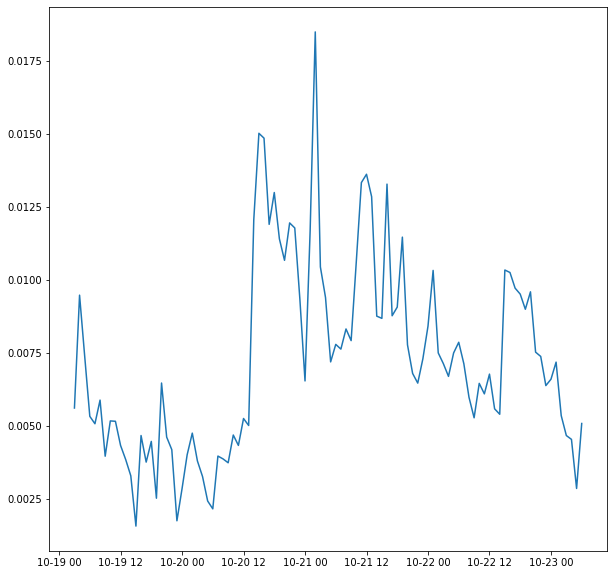

In [62]:
fig, ax = plt.subplots(1,1, figsize=(10, 10))
plt.plot(funding_df['effectiveAt'], funding_df['rate'])
plt.show()

In [64]:
#Candle Stick Data
from dydx3.constants import MARKET_BTC_USD

candles = client.public.get_candles(
  market=MARKET_BTC_USD,
  resolution='1DAY',
)

candles
candles = pd.DataFrame(candles["candles"])
candles.head(5)

,startedAt,market,resolution,low,high,open,close,baseTokenVolume,trades,usdVolume,startingOpenInterest
0,2021-10-23T00:00:00.000Z,BTC-USD,1DAY,60368,61547,60730,61105,5792.3096,44084,353643433.658,7843.4207
1,2021-10-22T00:00:00.000Z,BTC-USD,1DAY,60011,63756,62248,60732,38242.1779,168215,2373860843.7823,7852.4578
2,2021-10-21T00:00:00.000Z,BTC-USD,1DAY,62036,66700,66051,62258,47748.2578,193575,3077563562.2539,7934.9212
3,2021-10-20T00:00:00.000Z,BTC-USD,1DAY,63534,67100,64321,66051,34686.5441,161685,2259359639.1534,8115.5156
4,2021-10-19T00:00:00.000Z,BTC-USD,1DAY,61360,64506,62037,64322,44594.0243,211849,2799987602.9835,8348.4985


In [75]:
candles.apply(pd.to_numeric, errors='ignore').info()
candles.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   startedAt             100 non-null    object 
 1   market                100 non-null    object 
 2   resolution            100 non-null    object 
 3   low                   100 non-null    int64  
 4   high                  100 non-null    int64  
 5   open                  100 non-null    int64  
 6   close                 100 non-null    int64  
 7   baseTokenVolume       100 non-null    float64
 8   trades                100 non-null    int64  
 9   usdVolume             100 non-null    float64
 10  startingOpenInterest  100 non-null    float64
dtypes: float64(3), int64(5), object(3)
memory usage: 8.7+ KB


,startedAt,market,resolution,low,high,open,close,baseTokenVolume,trades,usdVolume,startingOpenInterest
0,2021-10-23T00:00:00.000Z,BTC-USD,1DAY,60368,61547,60730,61105,5792.3096,44084,353643433.658,7843.4207
1,2021-10-22T00:00:00.000Z,BTC-USD,1DAY,60011,63756,62248,60732,38242.1779,168215,2373860843.7823,7852.4578
2,2021-10-21T00:00:00.000Z,BTC-USD,1DAY,62036,66700,66051,62258,47748.2578,193575,3077563562.2539,7934.9212
3,2021-10-20T00:00:00.000Z,BTC-USD,1DAY,63534,67100,64321,66051,34686.5441,161685,2259359639.1534,8115.5156
4,2021-10-19T00:00:00.000Z,BTC-USD,1DAY,61360,64506,62037,64322,44594.0243,211849,2799987602.9835,8348.4985
